In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
import sklearn
import sklearn.datasets
import time 
import random 

def getData():
    ##simulate some wait time for grabbing the api data or database call
    time.sleep(random.randrange(10,60))
    
    data = sklearn.datasets.load_iris(as_frame=True)
    df = data['frame']
    df['target_names'] = df['target'].apply(lambda i:data['target_names'][i])
    return df

In [4]:
df = getData()

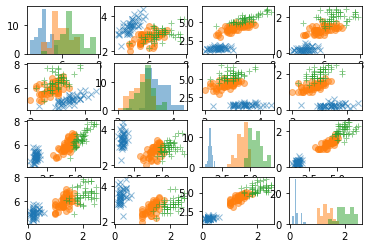

In [7]:
N=4 # number of feature columns
fig, axs = plt.subplots(N,N)#,sharex='col',sharey='row')
#print(axs.shape)
colors = ['C0','C1','C2']
markers = ['x','o','+']

for i in range(N):
    for j in range(N):
        if i == j:
            continue
        for label in range(3):
            x, y = df.query(f'target == {label}').iloc[:,[i,j]].values.T
            axs[i,j].plot(x, y, marker = markers[label], color=colors[label], ls="None", alpha=0.5)
            

for i in range(N):
    for label in range(3):
        x = df.query(f'target == {label}').iloc[:,i].values.T
        axs[i,i].hist(x,bins='auto', alpha=0.5)
        